In [2]:
import pandas as pd

import datetime
import time
import calendar

%matplotlib inline

import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df_bo = pd.read_csv("obama_press_release.csv")
df_dt = pd.read_csv("trump_w_content.csv")

In [5]:
df_bo.head()

,time,title,url,weekday
0,"January 16, 2017",President Obama Announces More Key Administrat...,https://obamawhitehouse.archives.gov//the-pres...,Monday
1,"January 16, 2017",Readout of Vice President Biden’s Meeting with...,https://obamawhitehouse.archives.gov//the-pres...,Monday
2,"January 16, 2017",Statement by NSC Spokesperson Ned Price on Dep...,https://obamawhitehouse.archives.gov//the-pres...,Monday
3,"January 16, 2017",Statement by the President on the One-Year Ann...,https://obamawhitehouse.archives.gov//the-pres...,Monday
4,"January 14, 2017",Readout of the Principal-Level Transition Exer...,https://obamawhitehouse.archives.gov//the-pres...,Saturday


In [6]:
df_dt.head()

,issue,time,title,type,url,weekday,content
0,LAND & AGRICULTURE,"Jul 6, 2018",President Donald J. Trump Approves Texas Disas...,STATEMENTS & RELEASES,https://www.whitehouse.gov/briefings-statement...,Friday,"['Today, President Donald J. Trump declared th..."
1,IMMIGRATION,"Jul 6, 2018",Remarks by Vice President Pence at U.S. Immigr...,REMARKS,https://www.whitehouse.gov/briefings-statement...,Friday,['U.S. Immigration And Customs Enforcement Hea...
2,ECONOMY & JOBS,"Jul 6, 2018","Jobs, Jobs, Jobs: The American Economy Is Booming",NEWS CLIPS,https://www.whitehouse.gov/briefings-statement...,Friday,['The United States economy added a healthy 21...
3,INFRASTRUCTURE & TECHNOLOGY,"Jul 6, 2018",Presidential Message on National Air Traffic C...,STATEMENTS & RELEASES,https://www.whitehouse.gov/briefings-statement...,Friday,"['On National Air Traffic Control Day, we reco..."
4,FOREIGN POLICY,"Jul 5, 2018",Readout of the Vice President’s Call with Mace...,STATEMENTS & RELEASES,https://www.whitehouse.gov/briefings-statement...,Thursday,['Vice President Mike Pence spoke with Prime M...


In [7]:
day = datetime.datetime.strptime("January 14, 2017", "%B %d, %Y")

day.isocalendar()

(2017, 2, 6)

In [8]:
def get_year(row):
    day = datetime.datetime.strptime(row["time"], "%B %d, %Y")
    year = day.isocalendar()[0]
    return year

In [9]:
df_bo["year"] = df_bo.apply(get_year, axis=1)

In [10]:
def get_week(row):
    day = datetime.datetime.strptime(row["time"], "%B %d, %Y")
    week = str(row["year"])+", week" + str(day.isocalendar()[1])
    return week

In [11]:
df_bo["week"] = df_bo.apply(get_week, axis=1)

In [12]:
def get_year(row):
    day = datetime.datetime.strptime(row["time"], "%b %d, %Y")
    year = day.isocalendar()[0]
    return year

In [13]:
df_dt["year"] = df_dt.apply(get_year, axis=1)

In [14]:
def get_week(row):
    day = datetime.datetime.strptime(row["time"], "%b %d, %Y")
    week = str(row["year"])+", week" + str(day.isocalendar()[1])
    return week

In [15]:
df_dt["week"] = df_dt.apply(get_week, axis=1)

In [16]:
df_bo.weekday.value_counts()

Thursday     2387
Wednesday    2250
Friday       2202
Tuesday      2120
Monday       1798
Saturday      593
Sunday        408
Name: weekday, dtype: int64

In [17]:
df_bo.groupby("year").weekday.value_counts()

year  weekday  
2009  Thursday     291
      Wednesday    290
      Friday       287
      Tuesday      273
      Monday       232
      Saturday      50
      Sunday        48
2010  Wednesday    410
      Thursday     359
      Tuesday      342
      Friday       330
      Monday       282
      Saturday     132
      Sunday        62
2011  Wednesday    330
      Friday       329
      Thursday     327
      Tuesday      260
      Monday       212
      Saturday     101
      Sunday        51
2012  Thursday     213
      Wednesday    202
      Friday       201
      Monday       198
      Tuesday      195
      Saturday      50
      Sunday        46
2013  Thursday     282
      Tuesday      246
      Friday       228
      Wednesday    204
      Monday       190
      Saturday      45
      Sunday        36
2014  Thursday     352
      Friday       302
      Tuesday      300
      Wednesday    286
      Monday       283
      Sunday        64
      Saturday      63
2015  Thursday    

In [18]:
df_bo.groupby("week").weekday.value_counts()

week          weekday  
2009, week10  Wednesday    11
              Friday        6
              Thursday      5
              Tuesday       4
              Monday        2
              Sunday        2
2009, week11  Thursday      8
              Friday        7
              Wednesday     6
              Monday        3
              Tuesday       2
              Saturday      1
              Sunday        1
2009, week12  Tuesday       9
              Wednesday     9
              Thursday      6
              Monday        4
              Friday        2
              Saturday      1
2009, week13  Thursday     10
              Tuesday      10
              Monday        7
              Friday        3
              Saturday      3
              Wednesday     3
2009, week14  Wednesday    11
              Thursday      8
              Friday        6
              Monday        6
              Tuesday       5
              Sunday        4
              Saturday      1
2009, week15  Th

In [19]:
df_bo[df_bo.weekday == "Friday"].groupby("week").count()

,time,title,url,weekday,year
week,,,,,
"2009, week10",6,6,6,6,6
"2009, week11",7,7,7,7,7
"2009, week12",2,2,2,2,2
"2009, week13",3,3,3,3,3
"2009, week14",6,6,6,6,6
"2009, week15",3,3,3,3,3
"2009, week16",5,5,5,5,5
"2009, week17",9,9,9,9,9
"2009, week18",10,10,10,10,10


In [20]:
# On 2011, week36, there were 28 articles dumped on whitehouse.gov
# What was happening?

df_bo[(df_bo.week == "2011, week36") & (df_bo.weekday == "Friday")]

# Oh right, the American Jobs Act

,time,title,url,weekday,year,week
7222,"September 09, 2011",United Food and Commercial Workers Internation...,https://obamawhitehouse.archives.gov//the-pres...,Friday,2011,"2011, week36"
7223,"September 09, 2011",BlueGreen Alliance Backs American Jobs Act,https://obamawhitehouse.archives.gov//the-pres...,Friday,2011,"2011, week36"
7224,"September 09, 2011",Hispanic Federation Backs American Jobs Act,https://obamawhitehouse.archives.gov//the-pres...,Friday,2011,"2011, week36"
7225,"September 09, 2011","Orlando, Florida Mayor Buddy Dyer Backs Americ...",https://obamawhitehouse.archives.gov//the-pres...,Friday,2011,"2011, week36"
7226,"September 09, 2011",Senator Robert Menendez Backs American Jobs Act,https://obamawhitehouse.archives.gov//the-pres...,Friday,2011,"2011, week36"
7227,"September 09, 2011",Teamsters Back American Jobs Act,https://obamawhitehouse.archives.gov//the-pres...,Friday,2011,"2011, week36"
7228,"September 09, 2011",Service Employees International Union (SEIU) B...,https://obamawhitehouse.archives.gov//the-pres...,Friday,2011,"2011, week36"
7229,"September 09, 2011",Readout of the President's Call with Israeli P...,https://obamawhitehouse.archives.gov//the-pres...,Friday,2011,"2011, week36"
7230,"September 09, 2011",President Obama Announces More Key Administrat...,https://obamawhitehouse.archives.gov//the-pres...,Friday,2011,"2011, week36"
7231,"September 09, 2011",Statement from National Security Council Spoke...,https://obamawhitehouse.archives.gov//the-pres...,Friday,2011,"2011, week36"


In [27]:
# df_bo.groupby("week").weekday.value_counts(normalize = True, sort = True).nlargest(100)

In [28]:
# df_dt.weekday.value_counts()

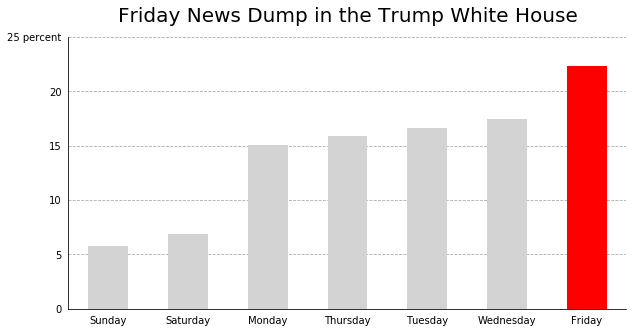

In [32]:
plt.rcParams.update({
    "pdf.fonttype" : 42,
    "ps.fonttype" : 42,
})

bar_colors = ["lightgrey","lightgrey","lightgrey","lightgrey","lightgrey","lightgrey","red"]

ax = df_dt[df_dt.type == "STATEMENTS & RELEASES"].weekday.value_counts(normalize = True, ascending = True).plot(kind = "bar", color = bar_colors, rot=0, figsize = (10, 5))
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20, 0.25])
ax.set_yticklabels([0, 5, 10, 15, 20, "25 percent"])
ax.grid(b = None, which = "major", axis = "y", color = "darkgrey", linestyle = "dashed")

ax.set_title("Friday News Dump in the Trump White House", pad = 15)
ax.title.set_fontsize(20)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.tick_params(which = "major", left = False, bottom = False)
ax.set_axisbelow(True)

plt.savefig("trump_news_dump.pdf")

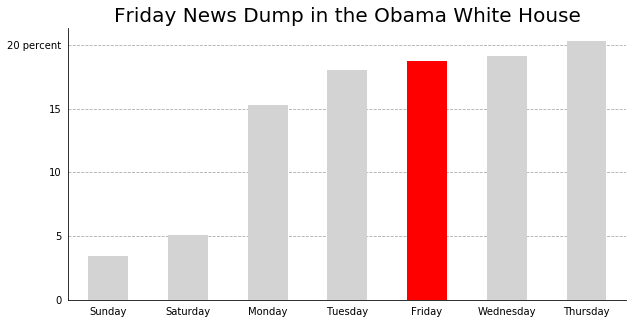

In [33]:
plt.rcParams.update({
    "pdf.fonttype" : 42,
    "ps.fonttype" : 42,
})

bar_colors = ["lightgrey","lightgrey","lightgrey","lightgrey","red", "lightgrey","lightgrey"]

ax = df_bo.weekday.value_counts(normalize = True, ascending = True).plot(kind = "bar", color = bar_colors, rot=0, figsize = (10, 5))
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels([0, 5, 10, 15, "20 percent"])
ax.grid(b = None, which = "major", axis = "y", color = "darkgrey", linestyle = "dashed")

ax.set_title("Friday News Dump in the Obama White House")
ax.title.set_fontsize(20)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.tick_params(which = "major", left = False, bottom = False)
ax.set_axisbelow(True)

plt.savefig("obama_news_dump.pdf")

# Question 1:
## So far I have ...

### 1. Scrape the press releases for the Obama White House and Trump White House
      - publish date
      - which day of the week
      - title
      - url
### 2. Get text for all the press releases, although the Obama White House one crashed my server ... and I didn't have enough time to analyze any texts

### 3. Did the most basic, most minimal data analysis, barely enough for me to make the graphs

# Question 2:

## I found that ...

### 1. Overall, the Trump Admin dumps news on Friday more often than the Obama admin, although it would be interesting to do year-by-year or even month-by-month comparison.

### Really, that's all I found for now

# Question 3:

## It would be nice to ...

### 1. Do more data analysis and some text analysis: Do some words appear more in Friday's press releases than other days? Was there a crazy week/month/period of time in Obama Admin (granted it was 8 years) that they dumped more news on Friday?

### 2. The websites of Clinton & Bush admins are also archived online, although they both are a MESS. I want to scrape those as well.
    links here:
        - Bush : https://georgewbush-whitehouse.archives.gov/news/
        - Clinton : https://clintonwhitehouse6.archives.gov/
            - btw the Clinton White House had six versions of their websites in the archive, SIX.

### 3. Make better charts, perhaps that one that allows a side-by-side comparison.

### 4. I really, really want to talk to someone who worked in the WH press office, or perhaps even someone in the press corps, to see if the data is significant.